# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




In [4]:
# Logo, para ser a hipótese alternativa teria que ser: H0 < H1. Então o teste é unilateral à direita, porque a hipótese alternativa indica que a média da Estratégia B é maior que a da Estratégia A(A alternativa nula indica que é a mesma coisa, não maior). Isso significa que estamos interessados apenas em verificar se os valores caem na cauda direita da distribuição, indicando que o resultado é tão extremo/alto que vale a pena descartar a hipótese nula (Em outras palavras, tão maior, logo, para a direita), já que é nessa região que estaria a evidência contra a hipótese nula.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [ ]:
# Primeiro vou verificar a média das amostras

med_Amostra_A = amostra_estrategia_A.mean() # Aqui estou simplemente verificando a média
med_Amostra_B = amostra_estrategia_B.mean()

print("A média da estrátégia A é: ", med_Amostra_A)
print("A média da estrátégia B é: ", med_Amostra_B)

# Agora as variâncias

var_A = amostra_estrategia_A.var(ddof=1) # Verificando a variancia e colocando ddof = 1 pois estamos lidando como a amostra e não com a população inteira se fosse a inteira poderia ser = 0
var_B = amostra_estrategia_B.var(ddof=1)

print("A variância da estratégia A é: ", var_A)
print("A variância da estratégia B é: ", var_B)

# Insights

# Após a análise, é possível notar que a média da amostra da Estratégia B foi maior, mas a diferença não é tão grande. Com base apenas nas médias, dá para acreditar que a Estratégia B seja mais eficaz, embora isso ainda não seja suficiente para descartar a hipótese nula. Em relação à variância, a da Estratégia A foi mais alta, o que mostra que, mesmo com média menor, as notas ficaram mais dispersas. Isso provavelmente indica que a Estratégia B pode ser melhor por oferecer resultados mais consistentes.

A média da estrátégia A é:  71.40559272313098
A média da estrátégia B é:  74.74868110507046
A variância da estratégia A é:  129.2654943565623
A variância da estratégia B é:  110.4700206552835


# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [ ]:
# O método visto em aula:

"""
# Primeiro o teste z

n=len(amostra_estrategia_A)

z_stat = (med_Amostra_B - med_Amostra_A) / ((var_A/n + var_B/n)**0.5)

# Agora o p-value

p_val = (1 - stats.norm.cdf(abs(z_stat)))

"""

# Um método mais fácil que encontrei com statsmodel:

z_stat, p_val = ztest(amostra_estrategia_B, amostra_estrategia_A, alternative='larger')

# Verificando resultado:

print(f"Z = {z_stat:.3f} | p-valor = {p_val:.4f}")

# Aplicando o teste de significância

alpha = 0.05

if p_val < alpha:
    print("Conclusão: rejeitamos H0. Há evidência de que a estratégia B tem valor estátistico relevante e se demonstra ser melhor que a estratégia A.")
else:
    print("Conclusão: não rejeitamos H0. Não há evidência suficiente de que B é melhor que A.")

# Respondendo, mesmo com algumas indicações que B poderia ser melhor, estatísticamente não é possível inferir com certeza que B é melhor que A, ainda mais se for utilizado o valor padrão de teste de significância que é 0.05. Toda via, o p-value é próximo do nível de significância, sendo 0.063, mas por não ser abaixo, não é possível reijeitar a hipótese nula. Concluindo, não há evidência suficiente para concluir que a estratégia B é superior à A.


Z = 1.527 | p-valor = 0.0634
Conclusão: não rejeitamos H0. Não há evidência suficiente de que B > A.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

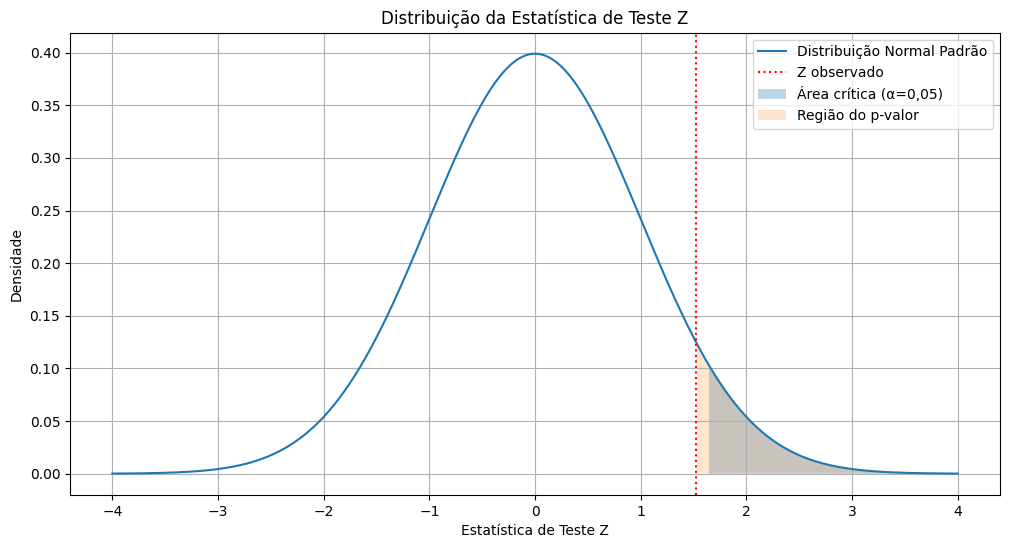

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

alpha = 0.05
critical = stats.norm.isf(alpha)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

ax.plot(x, y, label='Distribuição Normal Padrão')

ax.axvline(z_stat, ymin=0, ymax=1, linestyle='dotted', color='r', label='Z observado')

ax.fill_between(x, y, where=x >= critical, alpha=0.3, label='Área crítica (α=0,05)')
ax.fill_between(x, y, where=x >= z_stat, alpha=0.2, label='Região do p-valor')

ax.set_xlabel('Estatística de Teste Z')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição da Estatística de Teste Z')
ax.legend()
ax.grid(True)
plt.show()

# Pelo gráfico, dá para ver que a linha tracejada (o Z observado) fica bem próxima da região crítica, mas não entra nela. Isso indica que, no nível de 5%, não rejeitamos H0: a evidência não é suficiente para afirmar que a Estratégia B supera a A. Em outras palavras, o resultado ficou no limite, mas não alcançou o critério necessário para rejeitar a hipótese nula...